[![Commits since latest release][gh-image]][gh-link]

[gh-link]: https://github.com/claudioperez/elle-0002/compare/v0.0.0...master
[gh-image]: https://img.shields.io/github/commits-since/claudioperez/elle-0002/v0.0.0?style=social

In [1]:
import anon
#anon.conf.config.update('jax_disable_jit', True)
import elle.sections
import emme as em

In [2]:
column_section = em.aisc.load("w14x159")
girder_section = em.aisc.load("w33x130")

In [3]:
# Create a model Assembler
model = em.SkeletalModel(ndm=2,ndf=3)

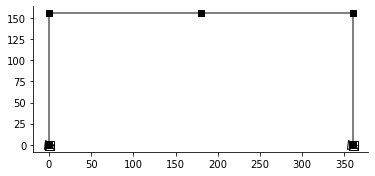

In [4]:
# Set up nodes
E = 29e6
ft = 12
B, H = 30.*ft, 13.*ft
model.node("1",  0.,  0.)
model.node("2",  0.,  H )
model.node("3", B/2,  H )
model.node("4",  B ,  H )
model.node("5",  B ,  0.)

model.beam("a", "1", "2", **column_section,E=E)
model.beam("b", "2", "3", **girder_section,E=E)
model.beam("c", "3", "4", **girder_section,E=E)
model.beam("d", "4", "5", **column_section,E=E)

model.boun("1", [1,1,1])
model.boun("5", [1,1,1])

model.load("2", 20e3, dof="x")

em.plot_structure(model);

In [5]:
f = model.compose()

In [6]:
U = f()

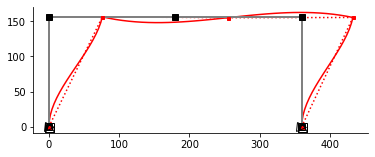

In [7]:
fig, ax = em.plot_displ(model, U, scale=1e3)

In [8]:
model.delems["a"].ke_matrix()

,$u_10$,$u_11$,$u_12$,$u_1$,$u_2$,$u_3$
$u_10$,1.741643e+05,0.000000e+00,-1.358481e+07,-1.741643e+05,0.000000e+00,-1.358481e+07
$u_11$,0.000000e+00,8.681410e+06,0.000000e+00,0.000000e+00,-8.681410e+06,0.000000e+00
$u_12$,-1.358481e+07,0.000000e+00,1.412821e+09,1.358481e+07,0.000000e+00,7.064103e+08
$u_1$,-1.741643e+05,0.000000e+00,1.358481e+07,1.741643e+05,0.000000e+00,1.358481e+07
$u_2$,0.000000e+00,-8.681410e+06,0.000000e+00,0.000000e+00,8.681410e+06,0.000000e+00
$u_3$,-1.358481e+07,0.000000e+00,7.064103e+08,1.358481e+07,0.000000e+00,1.412821e+09


In [9]:
em.K_matrix(model)

,$1$,$2$,$3$,$4$,$5$,$6$,$7$,$8$,$9$,$10$,$11$,$12$,$13$,$14$,$15$
$P_{1}$,6.344720e+06,0.000000e+00,1.358481e+07,-6.170556e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.741643e+05,0.000000e+00,1.358481e+07,0.000000e+00,0.000000e+00,0.000000e+00
$P_{2}$,0.000000e+00,9.081801e+06,3.603519e+07,0.000000e+00,-4.003909e+05,3.603519e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.681410e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
$P_{3}$,1.358481e+07,3.603519e+07,5.737043e+09,0.000000e+00,-3.603519e+07,2.162111e+09,0.000000e+00,0.000000e+00,0.000000e+00,-1.358481e+07,0.000000e+00,7.064103e+08,0.000000e+00,0.000000e+00,0.000000e+00
$P_{4}$,-6.170556e+06,0.000000e+00,0.000000e+00,1.234111e+07,0.000000e+00,0.000000e+00,-6.170556e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
$P_{5}$,0.000000e+00,-4.003909e+05,-3.603519e+07,0.000000e+00,8.007819e+05,0.000000e+00,0.000000e+00,-4.003909e+05,3.603519e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
$P_{6}$,0.000000e+00,3.603519e+07,2.162111e+09,0.000000e+00,0.000000e+00,8.648444e+09,0.000000e+00,-3.603519e+07,2.162111e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
$P_{7}$,0.000000e+00,0.000000e+00,0.000000e+00,-6.170556e+06,0.000000e+00,0.000000e+00,6.344720e+06,0.000000e+00,1.358481e+07,0.000000e+00,0.000000e+00,0.000000e+00,-1.741643e+05,0.000000e+00,1.358481e+07
$P_{8}$,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.003909e+05,-3.603519e+07,0.000000e+00,9.081801e+06,-3.603519e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.681410e+06,0.000000e+00
$P_{9}$,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.603519e+07,2.162111e+09,1.358481e+07,-3.603519e+07,5.737043e+09,0.000000e+00,0.000000e+00,0.000000e+00,-1.358481e+07,0.000000e+00,7.064103e+08
$P_{10}$,-1.741643e+05,0.000000e+00,-1.358481e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.741643e+05,0.000000e+00,-1.358481e+07,0.000000e+00,0.000000e+00,0.000000e+00
